<a href="https://www.kaggle.com/code/ashpreetsingh0/etl-eda-ml-dl-airline-dataset?scriptVersionId=122682735" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-passenger-satisfaction/train.csv
/kaggle/input/airline-passenger-satisfaction/test.csv


In [2]:
df = pd.read_csv('../input/airline-passenger-satisfaction/train.csv',index_col=0)
df2 = pd.read_csv('../input/airline-passenger-satisfaction/test.csv',index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [4]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

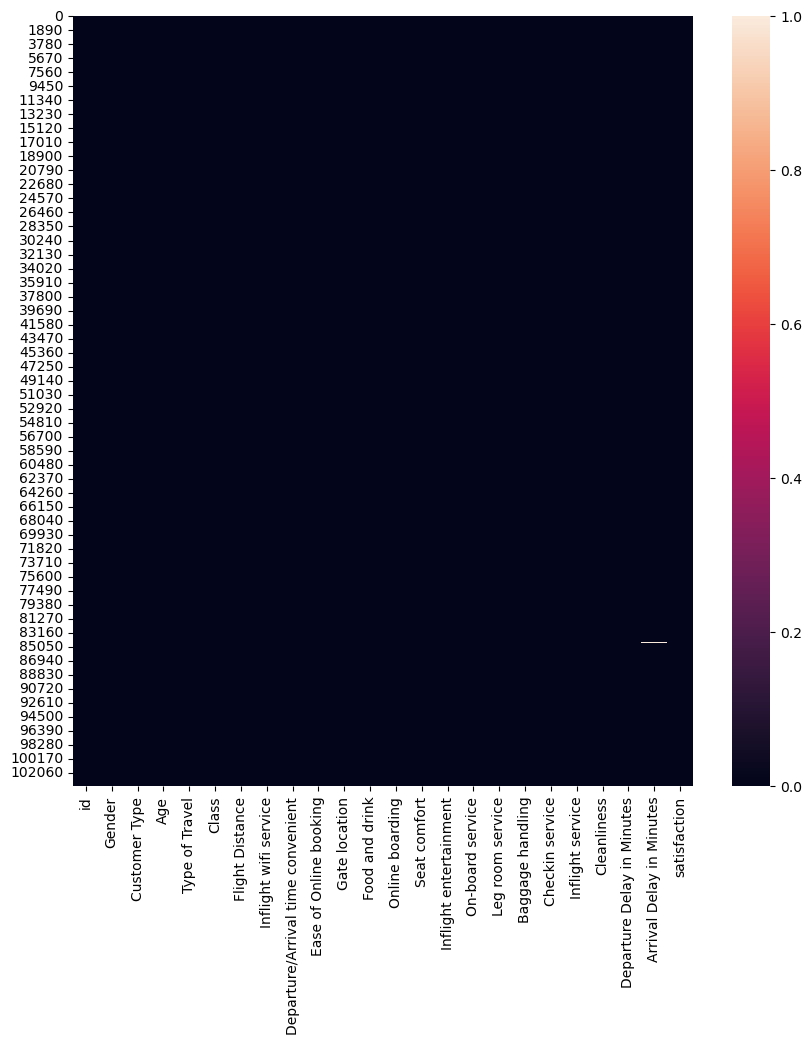

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())

In [7]:
mean_arr_delay = df['Arrival Delay in Minutes'].mean()
df['Arrival Delay in Minutes'].fillna(mean_arr_delay,inplace=True)
mean_arr_delay = df2['Arrival Delay in Minutes'].mean()
df2['Arrival Delay in Minutes'].fillna(mean_arr_delay,inplace=True)

In [8]:
df['Male'] = pd.get_dummies(df['Gender'])['Male']
df2['Male'] = pd.get_dummies(df2['Gender'])['Male']

In [9]:
df2['Male']

0        0
1        0
2        1
3        1
4        0
        ..
25971    1
25972    1
25973    0
25974    1
25975    0
Name: Male, Length: 25976, dtype: uint8

<AxesSubplot:xlabel='Class', ylabel='count'>

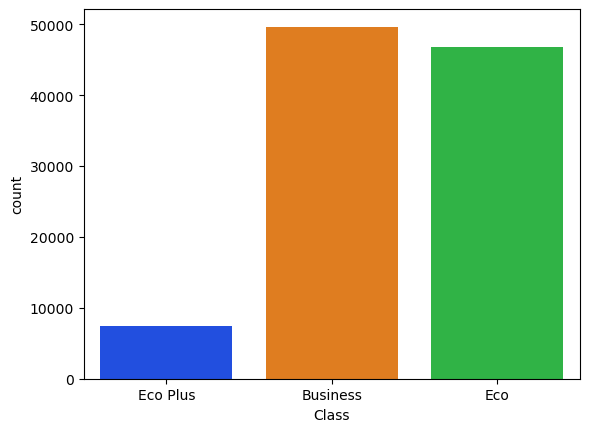

In [10]:
sns.countplot(x='Class',data=df,palette='bright')

<AxesSubplot:xlabel='Age', ylabel='Count'>

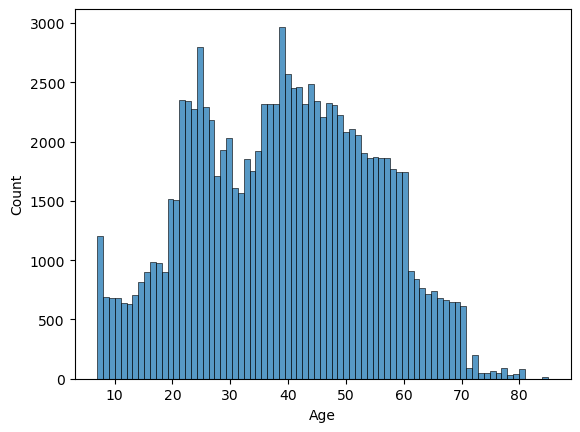

In [11]:
sns.histplot(df['Age'])

<AxesSubplot:xlabel='Customer Type', ylabel='count'>

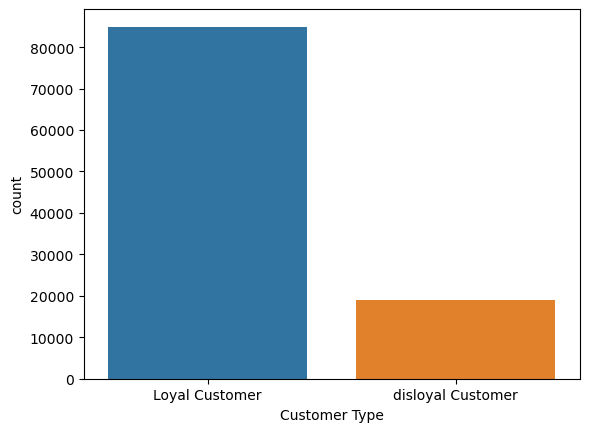

In [12]:
sns.countplot(x=df['Customer Type'])

In [13]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [14]:
def func1(string):
    if string=='satisfied':
        return 1
    else:
        return 0

In [15]:
df['satisfaction'] = df['satisfaction'].apply(func1)
df2['satisfaction'] = df2['satisfaction'].apply(func1)

In [16]:
df['Loyal Customer'] = pd.get_dummies(df['Customer Type'])['Loyal Customer']
df2['Loyal Customer'] = pd.get_dummies(df2['Customer Type'])['Loyal Customer']

In [17]:
df['Business travel'] = pd.get_dummies(df['Type of Travel'])['Business travel']
df2['Business travel'] = pd.get_dummies(df2['Type of Travel'])['Business travel']

In [18]:
def func2(string_class):
    if string_class=='Eco':
        return 1
    elif string_class=='Eco Plus':
        return 2
    else:
        return 3

In [19]:
df['Class'] = df['Class'].apply(func2)
df2['Class'] = df2['Class'].apply(func2)

In [20]:
df.drop(['id','Gender','Customer Type','Type of Travel'],axis=1,inplace=True)
df2.drop(['id','Gender','Customer Type','Type of Travel'],axis=1,inplace=True)

<AxesSubplot:>

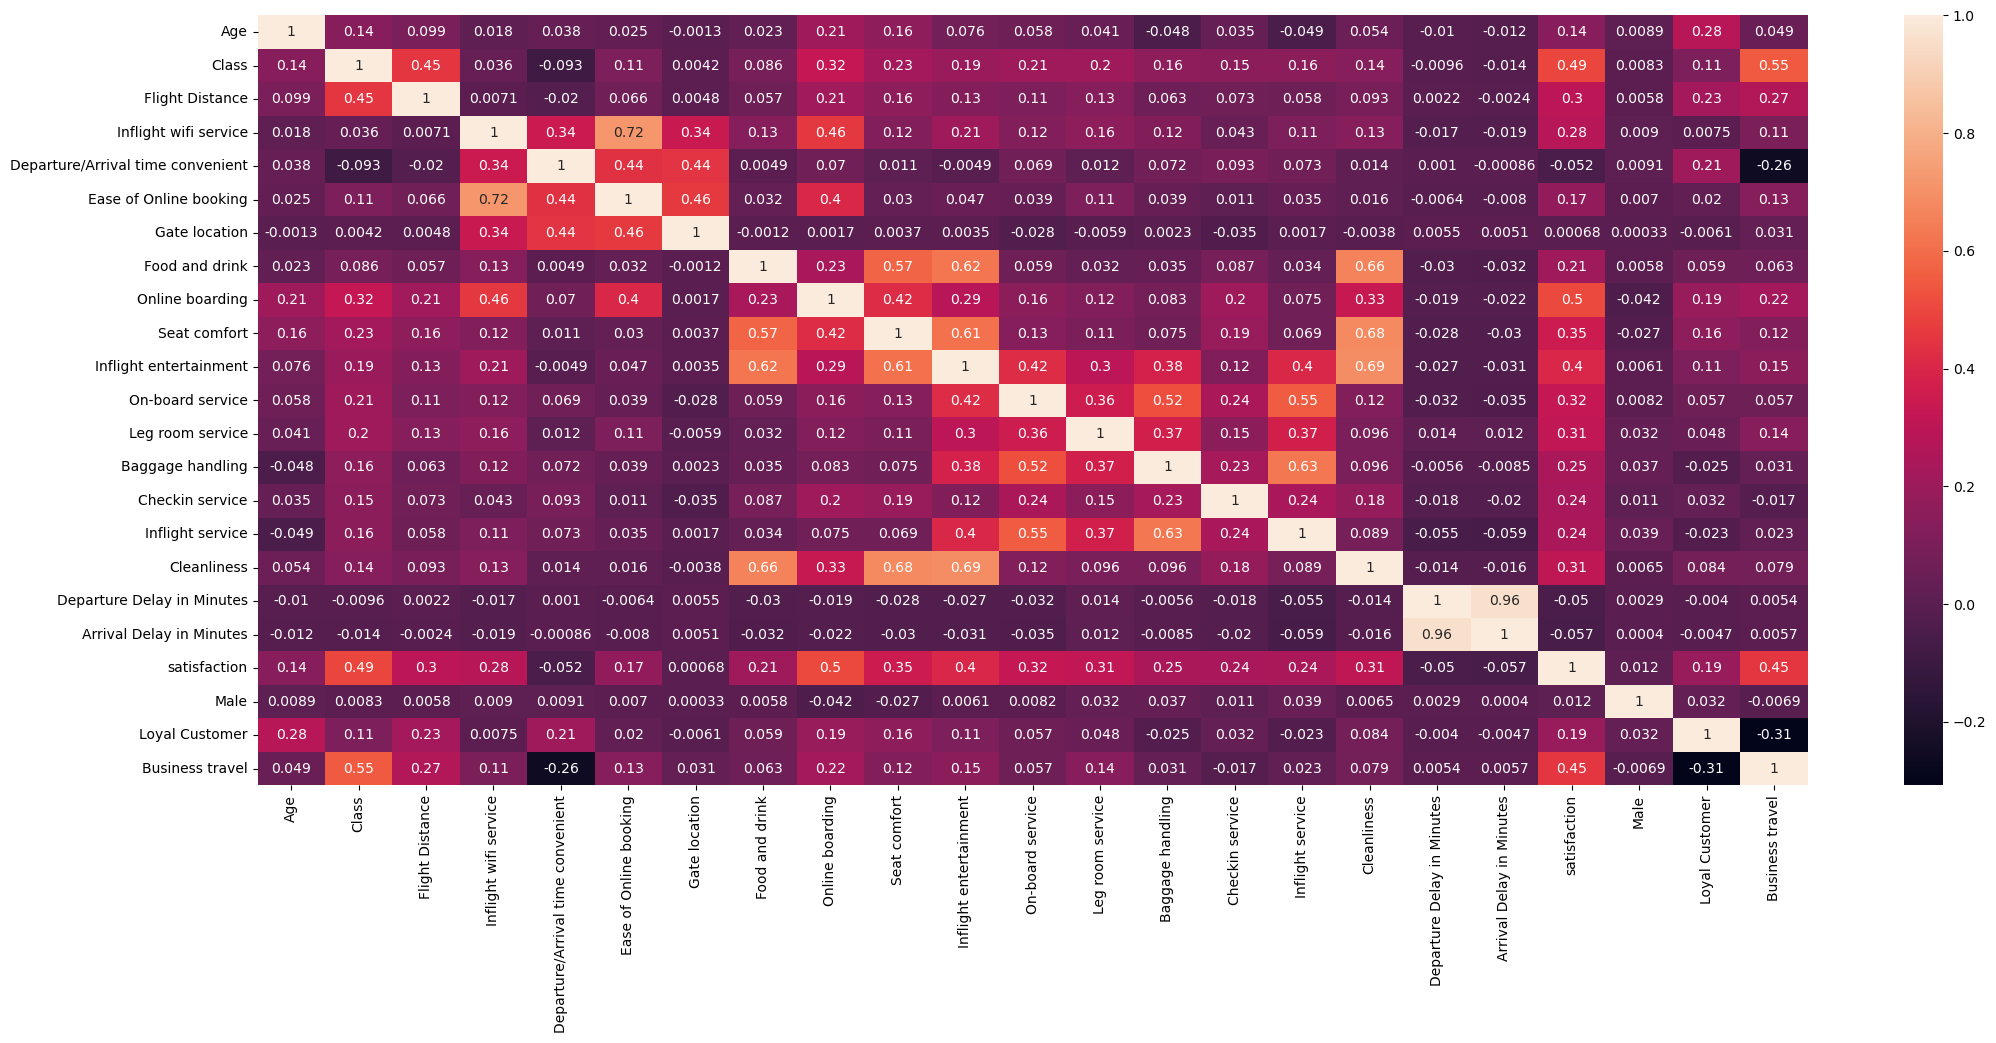

In [21]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True)

In [22]:
X = df.drop('satisfaction',axis=1)
y = df['satisfaction']

In [23]:
df

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Male,Loyal Customer,Business travel
0,13,2,460,3,4,3,1,5,3,5,...,4,4,5,5,25,18.0,0,1,1,0
1,25,3,235,3,2,3,3,1,3,1,...,3,1,4,1,1,6.0,0,1,0,1
2,26,3,1142,2,2,2,2,5,5,5,...,4,4,4,5,0,0.0,1,0,1,1
3,25,3,562,2,5,5,5,2,2,2,...,3,1,4,2,11,9.0,0,0,1,1
4,61,3,214,3,3,3,3,4,5,5,...,4,3,3,3,0,0.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,1,192,2,1,2,3,2,2,2,...,4,2,3,2,3,0.0,0,0,0,1
103900,49,3,2347,4,4,4,4,2,4,5,...,5,5,5,4,0,0.0,1,1,1,1
103901,30,3,1995,1,1,1,3,4,1,5,...,4,5,5,4,7,14.0,0,1,0,1
103902,22,1,1000,1,1,1,5,1,1,1,...,1,5,4,1,0,0.0,0,0,0,1


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
non_scale_col = ['Male','Class','Business travel','Loyal Customer','satisfaction']
a = df[['Age', 'Flight Distance', 'Inflight wifi service','Departure/Arrival time convenient', 'Ease of Online booking',
        'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
b = df[non_scale_col]
scalable_col = a.columns

In [26]:
sc = StandardScaler()

In [27]:
sc.fit(a)

StandardScaler()

In [28]:
a = sc.fit_transform(a)

In [29]:
a = pd.DataFrame(data=a,columns=scalable_col)
df = pd.concat([a, b], axis=1)

In [30]:
non_scale_col = ['Male','Class','Business travel','Loyal Customer','satisfaction']
a = df2[['Age', 'Flight Distance', 'Inflight wifi service','Departure/Arrival time convenient', 'Ease of Online booking',
        'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
b = df2[non_scale_col]
scalable_col = a.columns


In [31]:
sc = StandardScaler()

In [32]:
sc.fit(a)

StandardScaler()

In [33]:
a = sc.fit_transform(a)

In [34]:
a = pd.DataFrame(data=a,columns=scalable_col)
df2 = pd.concat([a, b], axis=1)

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc = RandomForestClassifier()

In [37]:
df.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Male', 'Class', 'Business travel', 'Loyal Customer', 'satisfaction'],
      dtype='object')

In [38]:
X_train = df[['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Male', 'Class', 'Business travel', 'Loyal Customer']]
y_train = df['satisfaction']

X_test = df2[['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Male', 'Class', 'Business travel', 'Loyal Customer']]
y_test = df2['satisfaction']

In [39]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
pred = rfc.predict(X_test)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(confusion_matrix(y_test,pred))

[[14266   307]
 [  663 10740]]


In [43]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [44]:
rfc.score(X_test,y_test)*100

96.26578380043117

In [45]:
df2

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Male,Class,Business travel,Loyal Customer,satisfaction
0,0.817887,-1.035171,1.703853,0.621641,0.172143,0.797831,-0.161739,0.544692,-0.340303,1.227138,...,-1.035348,1.144063,1.298998,0.953810,0.781143,0,1,1,1,1
1,-0.239238,1.671443,-1.291598,-1.334871,0.172143,-1.542065,1.340348,0.544692,1.174774,0.479907,...,-0.247517,0.297077,1.298998,-0.382286,-0.393543,0,3,1,1,1
2,-1.296363,-1.003128,-0.542735,-1.987042,-0.535609,0.797831,-0.912783,-0.930768,-1.097842,-1.014556,...,-1.035348,-1.396893,-0.974927,-0.382286,-0.393543,1,1,1,0,0
3,0.289325,2.186131,-2.040460,-1.987042,-1.951114,-0.762100,-0.161739,0.544692,0.417235,-1.761787,...,-0.247517,-2.243878,0.541023,-0.382286,-0.233358,1,3,1,1,1
4,0.619676,-0.011804,-0.542735,-0.030530,0.879895,0.017866,0.589304,-1.668498,-1.097842,-1.014556,...,0.540315,-1.396893,0.541023,-0.382286,0.140405,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,-0.371378,-0.668681,0.206128,-0.030530,0.172143,-1.542065,0.589304,-0.193038,0.417235,0.479907,...,0.540315,1.144063,0.541023,-0.382286,-0.393543,1,3,1,0,0
25972,-1.098152,-0.548521,0.954990,0.621641,0.879895,0.797831,0.589304,0.544692,0.417235,0.479907,...,1.328146,1.144063,0.541023,-0.382286,-0.393543,1,3,1,1,1
25973,-1.494573,-0.366278,-0.542735,1.273812,-1.243362,1.577797,-0.912783,-1.668498,-1.097842,-1.014556,...,1.328146,0.297077,-0.974927,-0.382286,-0.393543,0,1,0,1,0
25974,-1.692784,-0.066878,0.206128,-0.030530,0.172143,0.017866,0.589304,0.544692,0.417235,0.479907,...,0.540315,1.144063,0.541023,-0.382286,-0.393543,1,3,1,1,1


In [46]:
df

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Male,Class,Business travel,Loyal Customer,satisfaction
0,-1.745279,-0.731539,0.203579,0.616172,0.173776,-1.547323,1.352264,-0.185532,1.183099,1.231704,...,0.549799,1.156436,1.305870,0.266393,0.073014,1,2,0,1,0
1,-0.951360,-0.957184,0.203579,-0.695245,0.173776,0.018094,-1.656326,-0.185532,-1.849315,-1.769081,...,-1.821012,0.305848,-1.742292,-0.361375,-0.237539,1,3,1,0,0
2,-0.885200,-0.047584,-0.549533,-0.695245,-0.541060,-0.764614,1.352264,1.296496,1.183099,1.231704,...,0.549799,0.305848,1.305870,-0.387532,-0.392816,0,3,1,1,1
3,-0.951360,-0.629246,-0.549533,1.271880,1.603448,1.583511,-0.904178,-0.926545,-1.091211,-1.018885,...,-1.821012,0.305848,-0.980251,-0.099805,-0.159901,0,3,1,1,0
4,1.430397,-0.978244,0.203579,-0.039537,0.173776,0.018094,0.600117,1.296496,1.183099,-0.268688,...,-0.240472,-0.544740,-0.218211,-0.387532,-0.392816,1,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,-1.083680,-1.000307,-0.549533,-1.350954,-0.541060,0.018094,-0.904178,-0.926545,-1.091211,-1.018885,...,-1.030742,-0.544740,-0.980251,-0.309061,-0.392816,0,1,1,0,0
103900,0.636478,1.160869,0.956691,0.616172,0.888612,0.800803,-0.904178,0.555482,1.183099,1.231704,...,1.340069,1.156436,0.543829,-0.387532,-0.392816,1,3,1,1,1
103901,-0.620561,0.807860,-1.302646,-1.350954,-1.255895,0.018094,0.600117,-1.667559,1.183099,0.481508,...,1.340069,1.156436,0.543829,-0.204433,-0.030504,1,3,1,0,0
103902,-1.149840,-0.189991,-1.302646,-1.350954,-1.255895,1.583511,-1.656326,-1.667559,-1.849315,-1.769081,...,1.340069,0.305848,-1.742292,-0.387532,-0.392816,0,1,1,0,0


In [47]:
import tensorflow as tf

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop,Adam
model = Sequential()
model.add(Dense(100, activation='sigmoid', input_shape=(X_train.shape[1],)))
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [49]:
NN_Classifier = model.fit(X_train, y_train,
                          batch_size=1000,
                          epochs=15,
                          validation_data=(X_test, y_test))

Epoch 1/15
104/104 [==============================] - 1s 6ms/step - loss: 0.5019 - accuracy: 0.7764 - val_loss: 0.4285 - val_accuracy: 0.8194
Epoch 2/15
104/104 [==============================] - 0s 4ms/step - loss: 0.4011 - accuracy: 0.8388 - val_loss: 0.3899 - val_accuracy: 0.8406
Epoch 3/15
104/104 [==============================] - 0s 4ms/step - loss: 0.3746 - accuracy: 0.8528 - val_loss: 0.3710 - val_accuracy: 0.8534
Epoch 4/15
104/104 [==============================] - 0s 4ms/step - loss: 0.3589 - accuracy: 0.8617 - val_loss: 0.3577 - val_accuracy: 0.8635
Epoch 5/15
104/104 [==============================] - 0s 4ms/step - loss: 0.3473 - accuracy: 0.8676 - val_loss: 0.3471 - val_accuracy: 0.8681
Epoch 6/15
104/104 [==============================] - 0s 4ms/step - loss: 0.3375 - accuracy: 0.8722 - val_loss: 0.3369 - val_accuracy: 0.8721
Epoch 7/15
104/104 [==============================] - 0s 4ms/step - loss: 0.3280 - accuracy: 0.8764 - val_loss: 0.3276 - val_accuracy: 0.8760
Epoch 

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred=(model.predict(X_test) > 0.5).astype(int)   

print(classification_report(y_test, y_pred))

812/812 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     14573
           1       0.92      0.87      0.90     11403

    accuracy                           0.91     25976
   macro avg       0.91      0.91      0.91     25976
weighted avg       0.91      0.91      0.91     25976

